In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
#allows to print the dataframe nicely
from IPython.core import display as ICD
!pip install plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
# import additional packages to insepct data and clean them
import pandas as pd
import os 
import random 
from zipfile import ZipFile
import datetime

In [5]:
# import helping functions from the implementation file
#from proj1_helpers import load_csv_data
from proj1_helpers import *
import implementations
from additional_implementations import *
import seaborn as sns

In [6]:
# import zipped files from the github repository
data_folder='./data/'
zip_file = ZipFile(data_folder+'all.zip')
# zip file creates a list of files with certain properties
zip_file.infolist()

[<ZipInfo filename='train.csv' compress_type=deflate file_size=48103379 compress_size=17670847>,
 <ZipInfo filename='test.csv' compress_type=deflate file_size=109335584 compress_size=40089137>,
 <ZipInfo filename='sample-submission.csv' compress_type=deflate file_size=5682394 compress_size=1263762>]

In [13]:
# now we want to access the 'filename' property in the zipfile variable
# and we create a dictionary of dataframe
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
df_train=dfs['train.csv']
df_test=dfs['test.csv']
df_sample_submission=dfs['sample-submission.csv']

In [24]:
df_train_selection=df_train.drop(columns=['Prediction', 'Id'])

In [25]:
counts={}
for column_name in df_train_selection.columns.values:
    
    check=df_train_selection[column_name]==-999.0
    counts[column_name]=np.sum(check.astype('int'))
counts

{'DER_mass_MMC': 38114,
 'DER_mass_transverse_met_lep': 0,
 'DER_mass_vis': 0,
 'DER_pt_h': 0,
 'DER_deltaeta_jet_jet': 177457,
 'DER_mass_jet_jet': 177457,
 'DER_prodeta_jet_jet': 177457,
 'DER_deltar_tau_lep': 0,
 'DER_pt_tot': 0,
 'DER_sum_pt': 0,
 'DER_pt_ratio_lep_tau': 0,
 'DER_met_phi_centrality': 0,
 'DER_lep_eta_centrality': 177457,
 'PRI_tau_pt': 0,
 'PRI_tau_eta': 0,
 'PRI_tau_phi': 0,
 'PRI_lep_pt': 0,
 'PRI_lep_eta': 0,
 'PRI_lep_phi': 0,
 'PRI_met': 0,
 'PRI_met_phi': 0,
 'PRI_met_sumet': 0,
 'PRI_jet_num': 0,
 'PRI_jet_leading_pt': 99913,
 'PRI_jet_leading_eta': 99913,
 'PRI_jet_leading_phi': 99913,
 'PRI_jet_subleading_pt': 177457,
 'PRI_jet_subleading_eta': 177457,
 'PRI_jet_subleading_phi': 177457,
 'PRI_jet_all_pt': 0}

In [26]:
df_train_selection=df_train_selection.drop(columns=['PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'DER_lep_eta_centrality', 'DER_prodeta_jet_jet', 'DER_mass_jet_jet', 'DER_deltaeta_jet_jet','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi'])

In [27]:
counts={}
for column_name in df_train_selection.columns.values:
    
    check=df_train_selection[column_name]==-999.0
    counts[column_name]=np.sum(check.astype('int'))
counts

{'DER_mass_MMC': 38114,
 'DER_mass_transverse_met_lep': 0,
 'DER_mass_vis': 0,
 'DER_pt_h': 0,
 'DER_deltar_tau_lep': 0,
 'DER_pt_tot': 0,
 'DER_sum_pt': 0,
 'DER_pt_ratio_lep_tau': 0,
 'DER_met_phi_centrality': 0,
 'PRI_tau_pt': 0,
 'PRI_tau_eta': 0,
 'PRI_tau_phi': 0,
 'PRI_lep_pt': 0,
 'PRI_lep_eta': 0,
 'PRI_lep_phi': 0,
 'PRI_met': 0,
 'PRI_met_phi': 0,
 'PRI_met_sumet': 0,
 'PRI_jet_num': 0,
 'PRI_jet_all_pt': 0}

In [28]:
median=np.median(df_train_selection['DER_mass_MMC'])
df_train_selection['DER_mass_MMC'][df_train_selection['DER_mass_MMC']==-999.0]=median

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [32]:
y_train_selection=np.array(df_train['Prediction'])
y_train_selection[np.where(y_train_selection=='b')] = -1.
y_train_selection[np.where(y_train_selection=='s')] = 1.
y_train_selection=y_train_selection.astype('float')

In [30]:
tx_train_selection_polynomial=polynomial_features_simple(df_train_selection, 9)

In [33]:
w,loss=implementations.least_squares(y_train_selection,tx_train_selection_polynomial)
print('Weigths: ',w,"\n\n",'MSE: ',loss)

Weigths:  [-7.66614177e+00 -2.46055946e-01  4.32202478e-03 -3.52267443e-05
  1.55706091e-07 -4.02189851e-10  6.22712680e-13 -5.67438230e-16
  2.79864212e-19 -5.75049063e-23  9.43137951e-03 -3.64508123e-04
  5.86859975e-07  4.31495243e-08 -4.06731035e-10  1.61257322e-12
 -3.26294772e-15  3.30867917e-18 -1.33265406e-21 -2.39327879e-02
  3.04874037e-04 -3.09389726e-06  1.69025043e-08 -4.99939469e-11
  8.31575837e-14 -7.76585181e-17  3.79243784e-20 -7.52320594e-24
 -7.08397211e-03  1.69088541e-04 -1.71003418e-06  9.83265420e-09
 -3.10347650e-11  5.14449874e-14 -3.81940577e-17  3.48333283e-21
  6.37068730e-24  4.83572791e+01 -1.00957808e+02  1.16902562e+02
 -8.10421097e+01  3.49675704e+01 -9.45442579e+00  1.55521953e+00
 -1.42067706e-01  5.51832408e-03  2.45211319e-04 -5.84420413e-05
  1.24105962e-06 -7.80472919e-09  2.11334018e-11 -2.72547571e-14
  1.83748996e-17 -4.72981865e-21 -5.68972771e-24 -8.21812541e+01
  2.15808047e-04 -1.07709781e-06  3.04577881e-09 -5.18117810e-12
  5.39539571e-1

0.2866423509559663

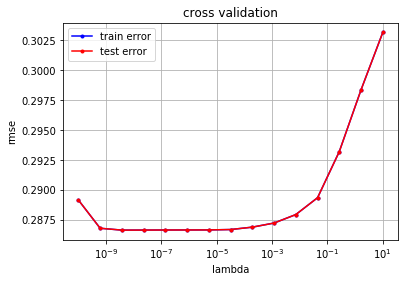

In [37]:
lambdas=np.logspace(-10,1,15)
mses=[]
ws=[]
for lambda_ in lambdas:
    w,loss=implementations.ridge_regression(y_train_selection,tx_train_selection_polynomial,lambda_)
    mses.append(loss)
    ws.append(w)
cross_validation_visualization(lambdas, mses, mses)
w_final=ws[np.argmin(mses)]
mses[np.argmin(mses)]

In [38]:
w_final

array([ 3.42941283e-01, -2.46572308e-01,  4.33286532e-03, -3.53192980e-05,
        1.56110488e-07, -4.03194416e-10,  6.24191854e-13, -5.68716702e-16,
        2.80463028e-19, -5.76220972e-23,  8.91082191e-03, -3.46253225e-04,
        3.00610590e-07,  4.55882598e-08, -4.18932020e-10,  1.64918567e-12,
       -3.32726470e-15,  3.36923703e-18, -1.35612767e-21, -2.44465324e-02,
        3.05426556e-04, -3.09206047e-06,  1.69395948e-08, -5.02606679e-11,
        8.38252738e-14, -7.84512943e-17,  3.83775720e-20, -7.62361988e-24,
       -7.70154666e-03,  1.89105904e-04, -1.93820627e-06,  1.10190697e-08,
       -3.41328645e-11,  5.55504575e-14, -4.06448427e-17,  3.78080281e-21,
        6.52605238e-24,  4.54390138e+00, -5.19924408e+00,  5.80806415e+00,
       -4.64332304e+00,  2.32176372e+00, -7.09852860e-01,  1.29068108e-01,
       -1.27903239e-02,  5.30474361e-04,  3.26382036e-04, -5.95746804e-05,
        1.22600032e-06, -7.52526494e-09,  1.97810900e-11, -2.51739743e-14,
        1.89247158e-17, -

In [39]:
y_pred=predict_labels(w_final,tx_train_selection_polynomial)
list(y_pred*y_train_selection).count(1.)/len(tx_train_selection_polynomial)

0.8068

In [46]:
df_test_selection=df_test

In [47]:
df_test_selection=df_test_selection.drop(columns=['Id', 'Prediction'])

In [48]:
df_test_selection=df_test_selection.drop(columns=['PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'DER_lep_eta_centrality', 'DER_prodeta_jet_jet', 'DER_mass_jet_jet', 'DER_deltaeta_jet_jet','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi'])

In [49]:
df_test_selection['DER_mass_MMC'][df_test_selection['DER_mass_MMC']==-999.0]=median

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [50]:
tx_test_selection_polynomial=polynomial_features_simple(df_test_selection, 9)

# Submission

In [51]:
tx_test=tx_test_selection_polynomial
y_pred=predict_labels(w_final,tx_test)
create_csv_submission(df_test['Id'], y_pred, 'trial_ridge_polynomial_selection')

### Comparison

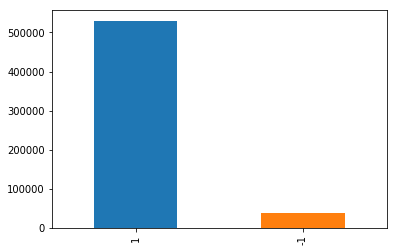

In [52]:
best=pd.read_csv('trial_ridge_polynomial_gau_basic3.csv')
selection=pd.read_csv('trial_ridge_polynomial_selection')

check=selection['Prediction']*best['Prediction']
check.value_counts().plot(kind='bar')

In [ ]:
def standardize_test(x, train_set):
    x=(x-np.mean(train_set,axis=0))/np.std(train_set, axis=0)
    return x
df_test_gau_std=standardize_test(df_test_gau, df_train_gau)